In [1]:
from scipy.integrate import ode, solve_ivp
import os, sys, time, copy
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../')
from Protocols.pacing_protocol import PacingProtocol
from Protocols.leakstaircase import LeakStaircase

sys.path.append('../')
import euler_simulator

sys.path.append('../Lib')

C:\Anaconda3\envs\ml\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [10]:
from Models.ord2017 import ORD2017
'''
O'Hara-Rudy CiPA v1.0 (2017)
'''

model = ORD2017()
simulator = euler_simulator.Simulator(model)
simulator.dt = 0.005

# prestep_protocol = mod_protocols.VoltageClampProtocol( [mod_protocols.VoltageClampStep(voltage=-87, duration=pre_step)] )
model.protocol = PacingProtocol(level=1, start=0, length=0.5, period=1000, multiplier=0, default_time_unit='ms')
simulator.simulate(end_time=500)                  
model.y0[:] = np.array(simulator.y_li)[-1,:]  
print(np.array(simulator.y_li)[-1,:])
print("Pre-simulation has been completed.")

[-8.79441378e+01  9.68346804e-03  7.38690644e-03  6.96103247e-01
  6.96102624e-01  6.96098569e-01  4.52659371e-01  6.96095442e-01
  1.90338617e-04  5.10213636e-01  2.94237037e-01  1.00499872e-03
  9.99549702e-01  7.71777609e-01  5.12074954e-04  9.99549702e-01
  8.17368244e-01  2.37294574e-09  9.99999991e-01  9.45558919e-01
  9.99999991e-01  9.99998675e-01  9.99999957e-01  2.12199735e-03
  9.99999991e-01  9.99999991e-01  9.99632126e-01  6.91363928e-05
  1.82232399e-08  8.36448884e-05  1.57683179e-04  5.76640794e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.13232671e-01  1.94040725e-04  9.96774536e-01  2.78756751e-07
  3.48425818e-07  7.26206504e+00  7.26214275e+00  1.44662279e+02
  1.44662252e+02  8.11221020e-05  7.94048678e-05  1.61407706e+00
  1.61033070e+00]
Pre-simulation has been completed.


In [22]:
simulated_model_li = []
for i in range(1):
    start_time = time.time()
    
    model.cell.mode=i    
    model.protocol = PacingProtocol(level=1, start=20, length=0.5, period=1000, multiplier=0, default_time_unit='ms')
    
    simulator.dt = 0.0005    
    simulator.simulate(end_time=500)  
    
    simulated_model_li.append(copy.copy(model))
    print("--- %s seconds ---"%(time.time()-start_time))

D:\Asan\Codes\Electrophysiology\Simulation_JK\Examples_euler\..\Models\ord2017.py:533: RuntimeWarning: divide by zero encountered in log
  - ((Kmax*Ku*np.exp(n*np.log(D)))/(np.exp(n*np.log(D))+halfmax) * O  - Ku * Obound)
D:\Asan\Codes\Electrophysiology\Simulation_JK\Examples_euler\..\Models\ord2017.py:536: RuntimeWarning: divide by zero encountered in log
  - ((Kmax*Ku*np.exp(n*np.log(D)))/(np.exp(n*np.log(D))+halfmax) * IO - (Ku*A53*np.exp(B53*V)*np.exp((Temp-20.0)*np.log(q53)/10.0))/(A63*np.exp(B63*V)*np.exp((Temp-20)*np.log(q63)/10)) * IObound)
D:\Asan\Codes\Electrophysiology\Simulation_JK\Examples_euler\..\Models\ord2017.py:537: RuntimeWarning: divide by zero encountered in log
  d_IObound = ( (Kmax * Ku * np.exp(n*np.log(D))) / (np.exp(n*np.log(D)) + halfmax) * IO \
D:\Asan\Codes\Electrophysiology\Simulation_JK\Examples_euler\..\Models\ord2017.py:540: RuntimeWarning: divide by zero encountered in log
  d_Obound = ( (Kmax * Ku * np.exp(n*np.log(D))) / (np.exp(n*np.log(D)) + halfma

--- 593.1402089595795 seconds ---


[-87.94413777 -87.94173953 -87.93938864 ...          nan          nan
          nan]


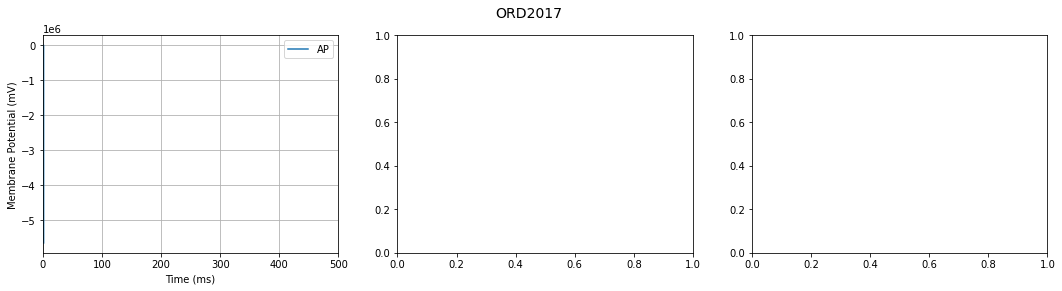

In [23]:
fig, axes = plt.subplots(1,3, figsize=(18,4))    
for i in range(1):
    model = simulated_model_li[i]
    
    # Plot AP    
    fig.suptitle(model.name, fontsize=14)
    # ax.set_title('Simulation %d'%(simulationNo))
    axes[i].set_xlim(model.times.min(), model.times.max())
    # ax.set_ylim(ylim[0], ylim[1])
    axes[i].set_ylabel('Membrane Potential (mV)')  
    axes[i].set_xlabel('Time (ms)')       
    axes[i].plot(model.times, model.V, label='AP')   
    # textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(GNa/g_fc[0], \
    #             GNaL/g_fc[1], Gto/g_fc[2], PCa/g_fc[3], GKr/g_fc[4], GKs/g_fc[5], GK1/g_fc[6], Gf/g_fc[7])
    # props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    #     ax.text(0.67, 0.60, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)    
    #     fig1 = plt.gcf()
    axes[i].legend()
    axes[i].grid()
    print(model.V)
    
plt.show()
fig.savefig(os.path.join('Results', "ORD2017"), dpi=100)

In [24]:
print("Complete")

Complete
